<h2>Analysis of the US Residential Home Prices and the factors influencing it

<h3>Factors are divided into Demand-side and Supply-side

Demand-side:
- Interest rates
- Economic growth
- Number of households
- Availability of mortgages
- Speculative demand
- Affordability of housing

Supply-side:
- New builds
    - Building permits
- Numbers selling
    - Delinquency rate

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

<h3>Importing all the necessary datasets

In [2]:
# The target variable
# S&P/Case-Shriller US National Home Price Index (Periodicity: Quarterly)
home_price_index = pd.read_csv('Downloads/Demand/S&P_Case-Shriller_USA_Home_Price_Index_Quarterly.csv')

# Demand-side factors
# Annual 30 Year Fixed Mortgage Interest Rate (Periodicity: Annual)
mort_interest = pd.read_csv('Downloads/Demand/MORTGAGE30US_Annual.csv')
# Annual GDP Growth % (Periodicity: Annual)
gdp_growth = pd.read_csv('Downloads/Demand/Real_GDP%_USA_Annually_2000_2022.csv')
# Annual Number of Households (Periodicity: Annual)
num_households = pd.read_csv('Downloads/Demand/Number_of_households_1940_2021_US.csv')
# Quarterly Housing Credit Availability Index (Periodicity: Quarterly)
hcai = pd.read_csv('Downloads/Demand/HCAI_USA_Quarterly.csv')
# Annual Housing Affordability Index (Periodicity: Annual)
hai = pd.read_csv('Downloads/Demand/Housing_Affordability_Index.csv')
# Annual Number of Homes Sold (Periodicity: Annual)
new_homes_sold = pd.read_csv('Downloads/Demand/Number_new_homes_sold.csv')

In [3]:
# Supply-side factors
# Annual Building Permits issued to new homes in 1000s (Periodicity: Annual)
building_permit = pd.read_csv('Downloads/Supply/Building Permits Annual in 1000s.csv')
# Quarterly Delinquency Rate for Single Family Residential Mortgages (Periodicity: Quarterly)
delinquency = pd.read_csv('Downloads/Supply/Delinquency_Rates_Quarterly_Single_Family_Residential_Mortgages.csv')

<h3> Data Preparation

<h4>S&P/Case-Shriller Home Price Index

In [4]:
home_price_index.head()

,DATE,CSUSHPISA
0,2000-01-01,101.339333
1,2000-04-01,103.673667
2,2000-07-01,105.785667
3,2000-10-01,108.272667
4,2001-01-01,110.483333


- The home price index has quarterly period. This is converted to annual periodicity for conducting analysis.
- The name of the second column 'CSUSHPISA' is changed for allowing easy readability. 

In [5]:
# Changing column name
home_price_index.rename({'CSUSHPISA':'Home_Price_Index'}, axis = 1, inplace = True)
home_price_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 2 columns):
DATE                87 non-null object
Home_Price_Index    87 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [6]:
# Changing data type of 'DATE' column
home_price_index.DATE = pd.to_datetime(home_price_index.DATE)
home_price_index['Year'] = pd.DatetimeIndex(home_price_index.DATE).year

In [7]:
home_price_index.head()

,DATE,Home_Price_Index,Year
0,2000-01-01,101.339333,2000
1,2000-04-01,103.673667,2000
2,2000-07-01,105.785667,2000
3,2000-10-01,108.272667,2000
4,2001-01-01,110.483333,2001


**Converting Home Price Index from quarterly to annual data**

In [8]:
years = home_price_index.Year.unique()
year_average = []
for y in years:
    year_average.append(np.mean(home_price_index[home_price_index['Year']==y]['Home_Price_Index']))

In [9]:
home_price_index_annual = pd.DataFrame({'Year':years, 'Home_Price_Index':year_average})

In [10]:
home_price_index_annual.describe()
# 2000 - 2021

,Year,Home_Price_Index
count,22.000000,22.000000
mean,2010.500000,165.887860
std,6.493587,36.274868
min,2000.000000,104.767833
25%,2005.250000,141.914333
50%,2010.500000,164.381417
75%,2015.750000,182.820917
max,2021.000000,254.572667


In [11]:
# Subsetting the data using the 'Year' column from 2000-2021
home_price_index_annual_subset = home_price_index_annual[(home_price_index_annual.Year>1999) & \
                                                        (home_price_index_annual.Year<2022)]

In [12]:
home_price_index_annual_subset.reset_index(drop = True, inplace = True)

In [13]:
home_price_index_annual_subset.head()

,Year,Home_Price_Index
0,2000,104.767833
1,2001,113.178333
2,2002,122.277750
3,2003,133.730583
4,2004,150.439583


<h3>Supply-side factors

<h4>Building Permits issued to New Homes (in 1000s)

In [14]:
building_permit.head()

,Universe,Year,Total US,1 unit US,2 units US,3 to 4 units US,5 units or more US,Total Northeast,1 unit Northeast,Total Midwest,1 unit Midwest,Total South,1 unit South,Total West,1 unit West
0,1984 Universe,1986,"1,769.4","1,077.6",50.4,58.0,583.5,283.3,203.8,290.0,167.5,686.5,443.2,509.7,263.1
1,NaN,1987,"1,534.8","1,024.4",40.8,48.5,421.1,271.8,194.0,282.3,180.3,574.7,413.1,406.0,236.9
2,NaN,1988,"1,455.6",993.8,35.0,40.7,386.1,230.2,166.0,266.3,177.8,543.5,391.6,415.6,258.3
3,NaN,1989,"1,338.4",931.7,31.7,35.3,339.8,179.0,129.7,252.1,172.1,505.3,361.5,402.1,268.4
4,NaN,1990,"1,110.8",793.9,26.7,27.6,262.6,125.8,96.5,233.8,165.7,426.2,318.1,324.9,213.7


- The column 'Universe' is unnecessary column which can be removed.

In [15]:
building_permit.drop('Universe', axis = 1, inplace = True)

In [16]:
building_permit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 14 columns):
Year                   35 non-null int64
Total US               35 non-null object
1 unit US              35 non-null object
2 units US             35 non-null float64
3 to 4 
units US       35 non-null float64
5 units 
or more US    35 non-null float64
Total Northeast        35 non-null float64
1 unit Northeast       35 non-null float64
Total Midwest          35 non-null float64
1 unit Midwest         35 non-null float64
Total South            35 non-null object
1 unit South           35 non-null float64
Total West             35 non-null float64
1 unit West            35 non-null float64
dtypes: float64(10), int64(1), object(3)
memory usage: 3.9+ KB


- No missing values in all columns.
- 'Total US', '1 unit US' and 'Total South' columns data type is changed to float

In [17]:
cols = ['Total US', '1 unit US', 'Total South']
for c in cols:
    building_permit[c] = [float(building_permit[c][i].replace(',','')) for i in range(len(building_permit))]

In [18]:
building_permit.describe()
# 1986 - 2020

,Year,Total US,1 unit US,2 units US,3 to 4 units US,5 units or more US,Total Northeast,1 unit Northeast,Total Midwest,1 unit Midwest,Total South,1 unit South,Total West,1 unit West
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2003.000000,1344.965714,960.305714,27.511429,28.080000,329.082857,147.785714,97.211429,245.348571,176.102857,612.074286,451.894286,339.760000,235.108571
std,10.246951,388.556163,318.447473,10.150363,12.470101,107.019876,49.091488,42.732959,82.037317,69.112979,181.162701,145.703526,110.744946,90.383312
min,1986.000000,583.000000,418.500000,10.700000,10.000000,121.100000,68.500000,39.000000,100.300000,70.500000,297.400000,227.100000,116.700000,81.900000
25%,1994.500000,1102.850000,752.150000,18.950000,17.550000,278.300000,121.200000,54.250000,185.150000,113.300000,497.000000,354.600000,272.900000,181.650000
50%,2003.000000,1371.600000,979.900000,28.300000,30.800000,341.400000,138.500000,104.500000,259.000000,172.100000,594.500000,443.200000,343.900000,235.000000
75%,2011.500000,1602.300000,1132.600000,34.250000,35.650000,387.700000,169.400000,124.250000,311.500000,235.100000,717.400000,525.800000,405.150000,281.100000
max,2020.000000,2155.300000,1682.000000,50.400000,58.000000,583.500000,283.300000,203.800000,371.000000,295.500000,1039.000000,826.800000,558.600000,450.000000


In [19]:
# Subsetting the data using the 'Year' column from 2000-2021
building_permit_subset = building_permit[(building_permit.Year>1999) & (building_permit.Year<2022)]

In [20]:
building_permit_subset.reset_index(drop = True, inplace = True)

In [21]:
building_permit_subset.rename({'Total US':'Total_Building_Permits_US', '1 unit US':'1_unit_Building_Permits'}, \
                             axis = 1, inplace = True)

/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [22]:
building_permit_subset.drop(['2 units US', '3 to 4 \nunits US', '5 units \nor more US', 'Total Northeast', \
                             '1 unit Northeast', 'Total Midwest', '1 unit Midwest', 'Total South', \
                             '1 unit South', 'Total West', '1 unit West'], axis = 1, inplace = True)

/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
building_permit_subset.head()

,Year,Total_Building_Permits_US,1_unit_Building_Permits
0,2000,1592.3,1198.1
1,2001,1636.7,1235.6
2,2002,1747.7,1332.6
3,2003,1889.2,1460.9
4,2004,2070.1,1613.4


<h4>Delinquency Rates on Single Family Residential Mortgages

In [24]:
delinquency.head()

,DATE,DRSFRMACBS
0,1991-01-01,3.10
1,1991-04-01,3.17
2,1991-07-01,3.22
3,1991-10-01,3.28
4,1992-01-01,3.13


In [25]:
delinquency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
DATE          123 non-null object
DRSFRMACBS    123 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


- No missing values.
- The periodicity in the data is quarterly. To conduct the analysis, it is changed to annually.
- The second column's name is changed for easy readability.

In [26]:
delinquency.rename({'DRSFRMACBS':'Delinquency_Rate'}, axis = 1, inplace = True)

In [27]:
delinquency.DATE = pd.to_datetime(delinquency['DATE'])

In [28]:
delinquency['Year'] = pd.DatetimeIndex(delinquency['DATE']).year

In [29]:
years = delinquency['Year'].unique()
averages = []
for y in years:
    averages.append(np.mean(delinquency[delinquency['Year']==y]['Delinquency_Rate']))

In [30]:
delinquency_annual = pd.DataFrame({'Year':years, 'Annual_Delinquency_Rate':averages})
delinquency_annual.head()

,Year,Annual_Delinquency_Rate
0,1991,3.1925
1,1992,2.9600
2,1993,2.6250
3,1994,2.2175
4,1995,2.1325


In [31]:
delinquency_annual.describe()
# 1991 - 2021

,Year,Annual_Delinquency_Rate
count,31.000000,31.000000
mean,2006.000000,3.995618
std,9.092121,2.939572
min,1991.000000,1.547500
25%,1998.500000,2.127500
50%,2006.000000,2.545000
75%,2013.500000,4.723750
max,2021.000000,10.897500


In [32]:
# Subsetting the data using the 'Year' column from 2000-2021
delinquency_annual_subset = delinquency_annual[(delinquency_annual['Year']>1999) & (delinquency_annual['Year']<2022)]

In [33]:
delinquency_annual_subset.reset_index(drop = True, inplace = True)

In [34]:
delinquency_annual_subset.head()

,Year,Annual_Delinquency_Rate
0,2000,2.0625
1,2001,2.3000
2,2002,2.1225
3,2003,1.8250
4,2004,1.5550


<h3>Demand-side factors

<h4>30 Year Fixed Mortgage Average Interest Rates

In [35]:
mort_interest.head()

,DATE,MORTGAGE30US
0,1971-01-01,7.541750
1,1972-01-01,7.383269
2,1973-01-01,8.044808
3,1974-01-01,9.187115
4,1975-01-01,9.047115


In [36]:
mort_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
DATE            51 non-null object
MORTGAGE30US    51 non-null float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


- No missing values in the data.
- The data type of 'DATE' column is changed to datetime.

In [37]:
mort_interest.DATE = pd.to_datetime(mort_interest['DATE'])
mort_interest['Year'] = pd.DatetimeIndex(mort_interest['DATE']).year

In [38]:
mort_interest.describe()
# 1971 - 2021

,MORTGAGE30US,Year
count,51.000000,51.000000
mean,7.801302,1996.000000
std,3.276740,14.866069
min,2.957692,1971.000000
25%,5.431760,1983.500000
50%,7.541750,1996.000000
75%,9.444135,2008.500000
max,16.641509,2021.000000


In [39]:
mort_interest.rename({'MORTGAGE30US':'Mortgage_Rate'}, axis = 1, inplace = True)

In [40]:
# Subsetting the data using the Year column from 2000-2021
mort_interest_subset = mort_interest[(mort_interest['Year']>1999) & (mort_interest['Year']<2022)]

In [41]:
mort_interest_subset.reset_index(drop = True, inplace = True)

In [42]:
mort_interest_subset.drop('DATE', axis = 1, inplace = True)

In [43]:
mort_interest_subset.head()

,Mortgage_Rate,Year
0,8.053462,2000
1,6.967885,2001
2,6.537308,2002
3,5.826981,2003
4,5.839231,2004


<h4>Annual GDP Growth %

In [44]:
gdp_growth.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,USA,REALGDPFORECAST,TOT,AGRWTH,A,2000,4.077157
1,USA,REALGDPFORECAST,TOT,AGRWTH,A,2001,0.954342
2,USA,REALGDPFORECAST,TOT,AGRWTH,A,2002,1.695943
3,USA,REALGDPFORECAST,TOT,AGRWTH,A,2003,2.796206
4,USA,REALGDPFORECAST,TOT,AGRWTH,A,2004,3.852555


In [45]:
gdp_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
LOCATION     23 non-null object
INDICATOR    23 non-null object
SUBJECT      23 non-null object
MEASURE      23 non-null object
FREQUENCY    23 non-null object
TIME         23 non-null int64
Value        23 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ KB


- Columns like 'LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE' and 'FREQUENCY' are dropped from the dataframe. 

In [46]:
gdp_growth.drop(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY'], axis = 1, inplace = True)

In [47]:
gdp_growth.rename({'Value':'GDP_Growth%', 'TIME':'Year'}, axis = 1, inplace = True)

In [48]:
gdp_growth.describe()
# 2000 - 2022

,Year,GDP_Growth%
count,23.00000,23.000000
mean,2011.00000,2.068231
std,6.78233,1.957903
min,2000.00000,-3.404589
25%,2005.50000,1.681708
50%,2011.00000,2.287780
75%,2016.50000,2.857531
max,2022.00000,5.559456


In [49]:
# Subsetting the data using the Year column from 2000-2021
gdp_growth_subset = gdp_growth[(gdp_growth.Year>1999) & (gdp_growth.Year<2022)]

In [50]:
gdp_growth_subset.reset_index(drop = True, inplace = True)

In [51]:
gdp_growth_subset.head()

,Year,GDP_Growth%
0,2000,4.077157
1,2001,0.954342
2,2002,1.695943
3,2003,2.796206
4,2004,3.852555


<h4>Annual Number of Households

In [52]:
num_households.head()

,Year,Total households,Total Family Households,Married couples,Other Family Male Householder,Other Family Female Householder,Total Non-Family Households,Non-Family Male householder,Non-Family Female householder
0,2021,"129,931","83,907","61,454","6,963","15,490","46,024","21,781","24,244"
1,2020,"128,451","83,677","62,342","6,503","14,832","44,774","21,304","23,470"
2,2019,"128,579","83,482","61,959","6,480","15,043","45,096","21,582","23,515"
3,2018,"127,586","83,088","61,241","6,424","15,423","44,498","21,017","23,481"
4,2017,"126,224","82,827","60,804","6,452","15,572","43,396","20,539","22,858"


In [53]:
# Sorting the 'Year' column in ascending order
num_households.sort_values('Year', ascending = True, inplace = True)

In [54]:
num_households.reset_index(drop = True, inplace = True)

In [55]:
num_households.head()

,Year,Total households,Total Family Households,Married couples,Other Family Male Householder,Other Family Female Householder,Total Non-Family Households,Non-Family Male householder,Non-Family Female householder
0,1940,"34,949","31,491","26,571","1,510","3,410","3,458","1,599","1,859"
1,1947,"39,107","34,964","30,612","1,129","3,223","4,143","1,388","2,755"
2,1948,"40,532","36,629","31,900","1,020","3,709","3,903","1,198","2,705"
3,1949,"42,182","38,080","33,257","1,197","3,626","4,102","1,308","2,794"
4,1950,"43,554","38,838","34,075","1,169","3,594","4,716","1,668","3,048"


In [56]:
num_households.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 9 columns):
Year                               81 non-null int64
Total households                   81 non-null object
Total Family Households            81 non-null object
Married couples                    81 non-null object
Other Family Male Householder      81 non-null object
Other Family Female Householder    81 non-null object
Total Non-Family Households        81 non-null object
Non-Family Male householder        81 non-null object
Non-Family Female householder      81 non-null object
dtypes: int64(1), object(8)
memory usage: 5.8+ KB


- No missing values
- Every column except 'Year' are object data type. They have to be converted to int.

In [57]:
# converting all the columns with data type object to int
columns = ['Total households', 'Total Family Households', 'Married couples', 'Other Family Male Householder', \
          'Other Family Female Householder', 'Total Non-Family Households', 'Non-Family Male householder', \
          'Non-Family Female householder']

for col in columns:
    num_households[col] = [int(num_households[col][i].replace(',','')) for i in range(len(num_households))]

In [58]:
num_households.describe()
# 1940 - 2021

,Year,Total households,Total Family Households,Married couples,Other Family Male Householder,Other Family Female Householder,Total Non-Family Households,Non-Family Male householder,Non-Family Female householder
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1983.901235,84494.493827,61372.518519,48940.691358,2926.530864,9505.333333,23121.962963,10061.567901,13060.493827
std,21.773611,27991.412669,14734.822471,8873.942162,1869.126749,4253.872653,13305.580411,6583.020961,6744.980675
min,1940.000000,34949.000000,31491.000000,26571.000000,1020.000000,3223.000000,3458.000000,1198.000000,1859.000000
25%,1966.000000,58406.000000,48399.000000,42263.000000,1285.000000,4982.000000,10007.000000,3299.000000,6708.000000
50%,1984.000000,85407.000000,62015.000000,50090.000000,2038.000000,9896.000000,23410.000000,9752.000000,13658.000000
75%,2002.000000,109297.000000,74329.000000,56747.000000,4438.000000,13143.000000,34969.000000,15579.000000,19390.000000
max,2021.000000,129931.000000,83907.000000,62342.000000,6963.000000,15669.000000,46024.000000,21781.000000,24244.000000


In [59]:
# Subsetting the data using the 'Year' column from 2000-2020
num_households_subset = num_households[(num_households['Year']>1999) & (num_households['Year']<2022)]

In [60]:
num_households_subset.reset_index(drop = True, inplace = True)

In [61]:
num_households_subset.columns

Index(['Year', 'Total households', 'Total Family Households',
       'Married couples', 'Other Family Male Householder',
       'Other Family Female Householder', 'Total Non-Family Households',
       'Non-Family Male householder', 'Non-Family Female householder'],
      dtype='object')

In [62]:
num_households_subset.drop(['Married couples', 'Other Family Male Householder', 'Other Family Female Householder', \
                            'Non-Family Male householder', \
                           'Non-Family Female householder'], axis = 1, inplace = True)



In [63]:
num_households_subset.head()

,Year,Total households,Total Family Households,Total Non-Family Households
0,2000,104705,72025,32680
1,2001,108209,73767,34442
2,2002,109297,74329,34969
3,2003,111278,75596,35682
4,2004,112000,76217,35783


<h4>Availability of Mortgages - Housing Credit Availability Index

In [64]:
hcai.head()

,Year,Quarter,highlight,Total Risk,Borrower Risk,Product Risk
0,1998,1,.,.,.,.
1,1998,2,.,.,.,.
2,1998,3,.,.,.,.
3,1998,4,.,.,.,.
4,1999,1,.,11.236,8.836,2.400


In [65]:
hcai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
Year             94 non-null object
Quarter          94 non-null int64
highlight        94 non-null object
Total
Risk       94 non-null object
Borrower
Risk    94 non-null object
Product
Risk     94 non-null object
dtypes: int64(1), object(5)
memory usage: 4.5+ KB


- No missing values
- 'Total Risk', 'Borrower Risk' and 'Product Risk' are of object data type. They have to be converted to float.
- The first four rows have string characters '.' for columns 'highlight', 'Total Risk', 'Borrower Risk' and 'Product Risk'. So these rows are dropped.
- The 'highlight' column is of no use so it is also dropped.

In [66]:
# dropping first four rows
hcai.drop([0, 1, 2, 3], axis = 0, inplace = True)

In [67]:
hcai.reset_index(drop = True, inplace = True)

In [68]:
# dropping the 'highlight' column
hcai.drop('highlight', axis = 1, inplace = True)

In [69]:
hcai.columns

Index(['Year', 'Quarter', 'Total\nRisk', 'Borrower\nRisk', 'Product\nRisk'], dtype='object')

- The last three column names are renamed for good readability.

In [70]:
# column names are updated for Total Risk, Borrower Risk and Product Risk
hcai.rename({'Total\nRisk':'Total Risk', 'Borrower\nRisk':'Borrower Risk', 'Product\nRisk':'Product Risk'}, axis = 1, inplace = True)

In [71]:
# converting 'Total Risk', 'Borrower Risk' and 'Product Risk' data types to float
hcai['Total Risk'] = hcai['Total Risk'].astype('float')
hcai['Borrower Risk'] = hcai['Borrower Risk'].astype('float')
hcai['Product Risk'] = hcai['Product Risk'].astype('float')

In [72]:
hcai.tail()

,Year,Quarter,Total Risk,Borrower Risk,Product Risk
85,2020,2,5.137,5.133,0.003
86,2020,3,4.989,4.986,0.003
87,2020,4,5.082,5.078,0.003
88,2021 Q1,1,5.125,5.121,0.004
89,2021 Q2,2,5.145,5.138,0.007


- In the 'Year' column, the two values have strings ' Q1' and ' Q2'. These strings are replaced with empty strings.

In [73]:
# For the last two rows, the 'Year' column has values of '2021 Q1' and '2021 Q2'.
# So, the strings ' Q1' and ' Q2' are replaced with empty strings.
hcai['Year'][88] = hcai['Year'][88].replace(' Q1','')
hcai['Year'][89] = hcai['Year'][89].replace(' Q2','')

/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [74]:
hcai.head()

,Year,Quarter,Total Risk,Borrower Risk,Product Risk
0,1999,1,11.236,8.836,2.400
1,1999,2,11.790,9.040,2.750
2,1999,3,13.209,9.471,3.737
3,1999,4,14.332,10.160,4.172
4,2000,1,14.764,10.372,4.393


- Converting periodicity of the HCAI data from quarterly to annual

In [75]:
year_list = hcai.Year.unique()

In [76]:
year_avg = []
for y in year_list:
    year_avg.append(np.mean(hcai[hcai['Year']==y]['Total Risk']))

In [77]:
hcai_annual = pd.DataFrame({'Year':year_list, 'Average Total Risk':year_avg})
hcai_annual.head()

,Year,Average Total Risk
0,1999,12.64175
1,2000,13.96350
2,2001,12.46725
3,2002,12.18050
4,2003,12.50925


In [78]:
hcai_annual.Year = hcai_annual['Year'].astype('int64')

In [79]:
hcai_annual.describe()
# 1999 - 2021

,Year,Average Total Risk
count,23.00000,23.000000
mean,2010.00000,9.016717
std,6.78233,3.995814
min,1999.00000,5.127000
25%,2004.50000,5.784500
50%,2010.00000,6.794750
75%,2015.50000,12.488250
max,2021.00000,16.813000


In [80]:
# Subsetting the data using the 'Year' column from 2000-2021
hcai_annual_subset = hcai_annual[(hcai_annual['Year']>1999) & (hcai_annual['Year']<2022)]

In [81]:
hcai_annual_subset.reset_index(drop = True, inplace = True)

In [82]:
hcai_annual_subset.head()

,Year,Average Total Risk
0,2000,13.96350
1,2001,12.46725
2,2002,12.18050
3,2003,12.50925
4,2004,14.93700


<h4>Affordability of Housing - Housing Affordability Index

In [83]:
hai.head()

,Year,ExMedPrice_US,Mrate_US,MFI_US,IQ_US,COMP_US,FIXED_US
0,1970,23000,8.35,9867,6697,147.3,147.3
1,1971,24800,7.67,10285,6770,151.9,151.9
2,1972,26700,7.52,11116,7183,154.8,154.8
3,1973,28900,8.01,12051,8151,147.9,147.9
4,1974,32000,9.02,12902,9905,130.3,130.3


In [84]:
hai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
Year               51 non-null int64
 ExMedPrice_US     51 non-null int64
 Mrate_US          51 non-null float64
 MFI_US            51 non-null int64
 IQ_US             51 non-null int64
 COMP_US           49 non-null float64
 FIXED_US          51 non-null float64
dtypes: float64(3), int64(4)
memory usage: 2.9 KB


In [85]:
hai.columns

Index(['Year', ' ExMedPrice_US ', ' Mrate_US ', ' MFI_US ', ' IQ_US ',
       ' COMP_US ', ' FIXED_US '],
      dtype='object')

- Column names of all columns have unnecessary spaces. Need to remove them.

In [86]:
hai.rename({' ExMedPrice_US ':'ExMedPrice_US', ' Mrate_US ':'Mrate_US', ' MFI_US ':'MFI_US', ' IQ_US ':'IQ_US', \
           ' COMP_US ':'COMP_US', ' FIXED_US ':'FIXED_US'}, axis = 1, inplace = True)

- There are two rows with missing values for 'COMP_US'. We only require the 'FIXED_US' column.
- 'COMP_US' column is dropped.

In [87]:
hai.drop('COMP_US', axis = 1, inplace = True)

In [88]:
hai.describe()

,Year,ExMedPrice_US,Mrate_US,MFI_US,IQ_US,FIXED_US
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1995.000000,130121.568627,7.779608,42039.470588,32144.000000,127.609804
std,14.866069,74870.395521,2.899983,20857.583210,12812.415337,29.450095
min,1970.000000,23000.000000,3.170000,9867.000000,6697.000000,68.900000
25%,1982.500000,69050.000000,5.735000,24006.500000,27716.500000,107.500000
50%,1995.000000,117000.000000,7.670000,40611.000000,32880.000000,123.600000
75%,2007.500000,187700.000000,9.290000,60845.500000,40608.000000,149.900000
max,2020.000000,300200.000000,15.380000,81077.000000,54288.000000,193.300000


In [89]:
# Subsetting the data for the 'Year' column
# 2000 - 2020
hai_subset = hai[(hai.Year>1999) & (hai.Year<2022)]

In [90]:
hai_subset.reset_index(drop = True, inplace = True)

In [91]:
hai_subset.drop(['ExMedPrice_US', 'Mrate_US', 'MFI_US', 'IQ_US'], axis = 1, inplace = True)

In [92]:
hai_subset.rename({'FIXED_US':'Housing_Affordability_Index'}, axis = 1, inplace = True)

In [93]:
hai_subset.head()

,Year,Housing_Affordability_Index
0,2000,120.5
1,2001,128.1
2,2002,124.2
3,2003,128.2
4,2004,120.3


<h4>Number of new homes sold (in 1000s) - Speculative Demand

In [94]:
new_homes_sold.head()

,Year,NewSold_US,NewSold_NE,NewSold_MW,NewSold_S,NewSold_W,ExSold_US,ExSold_NE,ExSold_MW,ExSold_S,ExSold_W
0,1963,560,87,134,199,141,NaN,NaN,NaN,NaN,NaN
1,1964,565,90,146,200,129,NaN,NaN,NaN,NaN,NaN
2,1965,575,94,142,210,129,NaN,NaN,NaN,NaN,NaN
3,1966,461,84,113,166,99,NaN,NaN,NaN,NaN,NaN
4,1967,487,77,112,179,119,NaN,NaN,NaN,NaN,NaN


In [95]:
new_homes_sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
Year          58 non-null int64
NewSold_US    58 non-null object
NewSold_NE    58 non-null int64
NewSold_MW    58 non-null int64
NewSold_S     58 non-null int64
NewSold_W     58 non-null int64
ExSold_US     53 non-null float64
ExSold_NE     53 non-null float64
ExSold_MW     53 non-null float64
ExSold_S      53 non-null float64
ExSold_W      53 non-null float64
dtypes: float64(5), int64(5), object(1)
memory usage: 5.1+ KB


- 'ExSold_US', 'ExSold_NE', 'ExSold_MW', 'ExSold_S' and 'ExSold_W' have 5 missing values
- 'NewSold_US' column has a object data type which should be converted to int64.

In [96]:
new_homes_sold[new_homes_sold.isnull().any(axis = 1)]

,Year,NewSold_US,NewSold_NE,NewSold_MW,NewSold_S,NewSold_W,ExSold_US,ExSold_NE,ExSold_MW,ExSold_S,ExSold_W
0,1963,560,87,134,199,141,NaN,NaN,NaN,NaN,NaN
1,1964,565,90,146,200,129,NaN,NaN,NaN,NaN,NaN
2,1965,575,94,142,210,129,NaN,NaN,NaN,NaN,NaN
3,1966,461,84,113,166,99,NaN,NaN,NaN,NaN,NaN
4,1967,487,77,112,179,119,NaN,NaN,NaN,NaN,NaN


In [97]:
# First 5 rows with missing values dropped
new_homes_sold.drop([0,1,2,3,4], axis = 0, inplace = True)

In [98]:
# 'NewSold_US' column has an object data type
new_homes_sold.reset_index(drop = True, inplace = True)

In [99]:
new_homes_sold.dtypes

Year            int64
NewSold_US     object
NewSold_NE      int64
NewSold_MW      int64
NewSold_S       int64
NewSold_W       int64
ExSold_US     float64
ExSold_NE     float64
ExSold_MW     float64
ExSold_S      float64
ExSold_W      float64
dtype: object

In [100]:
new_homes_sold.NewSold_US[35:39]

35    1,086
36    1,203
37    1,283
38    1,051
Name: NewSold_US, dtype: object

- In the 'NewSold_US' column, in rows 36, 37, 38 and 39 the numbers have a comma.
- This is making data type of the column to object.

In [101]:
new_homes_sold['NewSold_US'][35] = new_homes_sold['NewSold_US'][35].replace(',', '')
new_homes_sold['NewSold_US'][36] = new_homes_sold['NewSold_US'][36].replace(',', '')
new_homes_sold['NewSold_US'][37] = new_homes_sold['NewSold_US'][37].replace(',', '')
new_homes_sold['NewSold_US'][38] = new_homes_sold['NewSold_US'][38].replace(',', '')

/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so w

In [102]:
# 'NewSold_US' data type converted to int64
new_homes_sold['NewSold_US'] = new_homes_sold['NewSold_US'].astype('int64')

In [103]:
new_homes_sold.describe()
# 1994 - 2020

,Year,NewSold_US,NewSold_NE,NewSold_MW,NewSold_S,NewSold_W,ExSold_US,ExSold_NE,ExSold_MW,ExSold_S,ExSold_W
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1994.000000,664.773585,64.698113,108.396226,311.396226,180.150943,4011.849057,630.000000,1004.339623,1505.207547,873.018868
std,15.443445,212.097641,25.441929,42.739524,105.514735,64.518452,1385.564650,224.990256,283.310712,581.482864,342.482312
min,1968.000000,306.000000,21.000000,45.000000,168.000000,72.000000,1569.000000,240.000000,490.000000,529.000000,292.000000
25%,1981.000000,509.000000,46.000000,72.000000,233.000000,139.000000,3064.000000,493.000000,831.000000,1073.000000,600.000000
50%,1994.000000,650.000000,66.000000,102.000000,295.000000,176.000000,3886.000000,640.000000,1010.000000,1353.000000,887.000000
75%,2007.000000,776.000000,79.000000,130.000000,348.000000,216.000000,5174.000000,723.000000,1228.000000,2050.000000,1150.000000
max,2020.000000,1283.000000,136.000000,210.000000,638.000000,358.000000,7076.000000,1169.000000,1588.000000,2702.000000,1617.000000


In [104]:
# Subsetting each dataframe using the Year column
# So that all features can be compared across the same length of time
new_homes_sold_subset = new_homes_sold[(new_homes_sold['Year']>1999) & (new_homes_sold['Year']<2022)]

In [105]:
new_homes_sold_subset.reset_index(drop = True, inplace = True)

In [106]:
new_homes_sold_subset.drop(['NewSold_NE', 'NewSold_MW', 'NewSold_S', 'NewSold_W', 'ExSold_NE', 'ExSold_MW', \
                            'ExSold_S', 'ExSold_W'], axis = 1, inplace = True)

In [107]:
new_homes_sold_subset.head()

,Year,NewSold_US,ExSold_US
0,2000,877,5174.0
1,2001,908,5335.0
2,2002,973,5632.0
3,2003,1086,6175.0
4,2004,1203,6778.0


<h3>Exploratory Data Analysis

<h4>Univariate Analysis - Demand factors

In [108]:
home_price_index_annual_subset.head()

,Year,Home_Price_Index
0,2000,104.767833
1,2001,113.178333
2,2002,122.277750
3,2003,133.730583
4,2004,150.439583


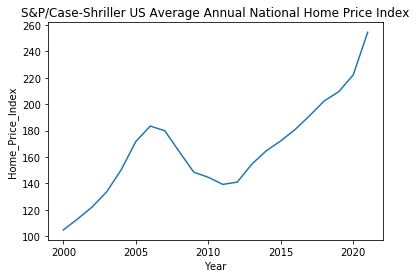

In [109]:
# S&P/Case-Shriller US National Home Price Index
sns.lineplot(x = 'Year', y = 'Home_Price_Index', data = home_price_index_annual_subset)
plt.title('S&P/Case-Shriller US Average Annual National Home Price Index')
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.show()

- S&P/Case-Shriller US National Home Price Index is a measure of tracking the changes in US Home Prices.
- The home price index witnessed a rise for 5 years from the beginning of 2000.
- Around 2006, the home price index was above 180 approximately. But after that a downward trend was seen.
- During 2008, there was the financial crisis in the US. This clearly affected the real estate market, with buyers discouraged or unable to purchase new homes.
- This drop in demand contributed to this downward trend in the Home Price Index.
- The real estate market went through dip to 2012, after which it drove towards recovery. The increase in Home Price Index from 2012 proves the previous statement.

In [110]:
mort_interest_subset.head()

,Mortgage_Rate,Year
0,8.053462,2000
1,6.967885,2001
2,6.537308,2002
3,5.826981,2003
4,5.839231,2004


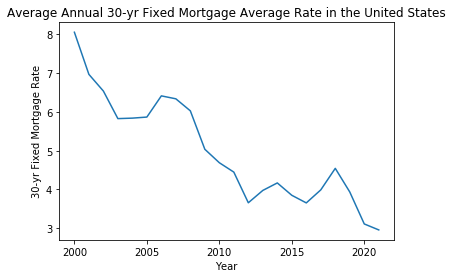

In [111]:
# 30 Year Fixed Annual Mortgage Average Rate from 2000-2021
sns.lineplot(x = 'Year', y = 'Mortgage_Rate', data = mort_interest_subset)
plt.xlabel('Year')
plt.ylabel('30-yr Fixed Mortgage Rate')
plt.title('Average Annual 30-yr Fixed Mortgage Average Rate in the United States')
plt.show()

- The 30-Year Fixed Mortgage Average Rate has witnessed a downturn in the past 20 years. At the start of the new millenium, the 30-Year Fixed Mortgage Average Rate was at 8%.
- Higher mortgage rates means greater monthly principal and interest repayments. This discourages the consumer in taking a mortgage loan.
- In three years, mortgage rates dropped by 2%. Around the time of the financial crisis, mortgage rates plunged below 4% which was a historic low in 2012.
- Then a positive growth is observed in the rates following the housing crisis, with the mortgage rate being around 5%. But a resurgence in the dropping of rates is observed on the onset of Covid-19 pandemic.
- In this pandemic, the rates hit record lows of less than 3%.

In [112]:
gdp_growth_subset.head()

,Year,GDP_Growth%
0,2000,4.077157
1,2001,0.954342
2,2002,1.695943
3,2003,2.796206
4,2004,3.852555


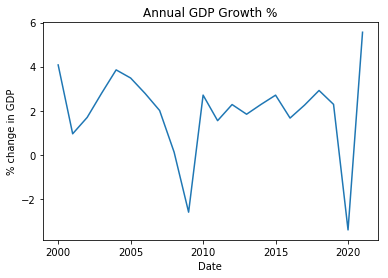

In [113]:
# Annual GDP growth %
sns.lineplot(x = 'Year', y = 'GDP_Growth%', data = gdp_growth_subset)
plt.xlabel('Date')
plt.ylabel('% change in GDP')
plt.title('Annual GDP Growth %')
plt.show()

- For the past 20 years, the gdp growth has through ups and downs. The beginning of 2000 saw a +4% growth in GDP.
- This followed with a 3% drop in a couple of years, however a recovery back to previous level is seen later.
- Then a drastic drop-off is visible from 2005 in GDP growth. This was around the time of the huge financial crisis. A negative growth below -2% was reached in 2009.
- In a couple of years a V-shaped recovery took place. Then for the next decade the growth rate remained on average at 2%.
- Then at the end of 2019 signs of a downturn is visible. On the onset of Covid-19, the sentiment of the market hit a low. Economies of countries all over the world were severely impacted.
- However, in 2021 positive signs of recovery are seen in the GDP which could be due to removal of nation-wide lockdown and reopening of businesses across the country.

In [114]:
num_households_subset.tail()

,Year,Total households,Total Family Households,Total Non-Family Households
18,2017,126224,82827,43396
19,2018,127586,83088,44498
20,2019,128579,83482,45096
21,2020,128451,83677,44774
22,2021,129931,83907,46024


In [115]:
num_households_subset['%_Family_Households'] = 100*(num_households_subset['Total Family Households']/num_households_subset['Total households'])
num_households_subset.head()

/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Year,Total households,Total Family Households,Total Non-Family Households,%_Family_Households
0,2000,104705,72025,32680,68.788501
1,2001,108209,73767,34442,68.170855
2,2002,109297,74329,34969,68.006441
3,2003,111278,75596,35682,67.934363
4,2004,112000,76217,35783,68.050893


/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


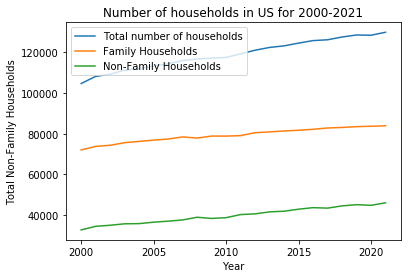

In [116]:
# Number of households
sns.lineplot(x = 'Year', y = 'Total households', data = num_households_subset, label = 'Total number of households')
sns.lineplot(x = 'Year', y = 'Total Family Households', data = num_households_subset, label = \
            'Family Households')
sns.lineplot(x = 'Year', y = 'Total Non-Family Households', data = num_households_subset, label = \
            'Non-Family Households')
plt.title('Number of households in US for 2000-2021')
plt.show()

- The number of households in United States in the past 20 years has gone up by over 30000 from approximately 104000.
- Classification of this number is made in two categories - Family and Non-Family households.
- Family households are households maintained by a householder who is in a family.
- Non-Family households are households maintained by a householder who doesn't belong to a family and lives alone or with people who he\she is not related to.
- The data shows that family households constitute approximately 68% on average of the total number of households in US.

In [117]:
hcai_annual_subset.head()

,Year,Average Total Risk
0,2000,13.96350
1,2001,12.46725
2,2002,12.18050
3,2003,12.50925
4,2004,14.93700


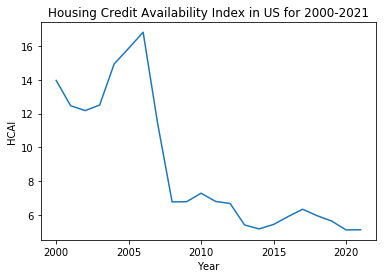

In [118]:
# Housing Credit Availability Index
sns.lineplot(x = 'Year', y = 'Average Total Risk', data = hcai_annual_subset)
plt.title('Housing Credit Availability Index in US for 2000-2021')
plt.xlabel('Year')
plt.ylabel('HCAI')
plt.show()

- Housing Credit Availability Index (HCAI) measures the difficulty of getting a mortgage in United States by quantifying the lender's tolerance for risk.
- A lower HCAI means the lender is unwilling to take a risk and tolerate defaults by imposing tighter lending standards, making it harder to take a loan.
- On the other hand, a high HCAI implies the lender's are willing to take risks and tolerate defaults, hence making it easier to get a loan.
- From 2000, the index is at 14 (approx.) after which it goes through downward dip for 5 years. Then around 2006 it touches it maximum where the HCAI crosses 16. This implies the mortgage market showing positive signs with getting a mortgage becoming easy.
- However, this index dives down off a clif from 2007, as we can see above. At the time of the huge financial crisis in 2009, the index plunged to approximately 7.
- For a few years after the crisis, the index did not show any signs of recovery to previous levels. Moreover, HCAI slid below a value of 6 in the year 2014.
- Within a couple of years, the index showed a positive trend. But then at the end of 2019, Covid-19 struck the United States which slammed all the positive growth made in the HCAI and the index stayed at its minimum.

In [119]:
max(hai_subset.Housing_Affordability_Index)

193.3

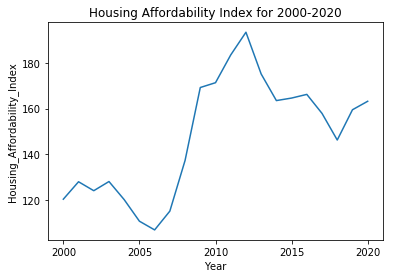

In [120]:
# Housing Affordability Index (1999-2020)
sns.lineplot(x = 'Year', y = 'Housing_Affordability_Index', data = hai_subset)
plt.title('Housing Affordability Index for 2000-2020')
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.show()

- Housing Affordability Index (HAI) measures whether a typical family earns enough income to qualify for a 30-year Fixed Mortgage Loan on a typical single-family home. The monthly principal and interest payment cannot exceed 25% of the median family's monthly income. Also, a 20% down payment is assumed on the mortgage.
- A value above 100 means a median-income family has enough income so that it can purchase a median-priced home. A higher value implies more households can afford a median-priced home.
- In the beginning of year 2000, the index is approximately 120. Until 2003, the HAI remains just above 120.
- But, a downward trend is observed as after a couple of years, wherein the index reaches a minimum value just above 100.
- After 2006, a V-shaped feature is seen in the data which kickstarts an upward recovery in the Housing Affordability Index for close to 5 years. This period is around the time of the big financial crisis.
- The interesting point to note is that in the time of this crisis, economic growth slowed down and home prices plunged. Therefore, this eventually made purchasing new homes more affordable for a typical household. Hence a steep rise in HAI from 2008 to 2011.
- The index touches close to 190 in 2013, which is the highest its been in the 20 years. Then after which a downward trend takes place upto 2020.

In [121]:
new_homes_sold_subset.head(6)

,Year,NewSold_US,ExSold_US
0,2000,877,5174.0
1,2001,908,5335.0
2,2002,973,5632.0
3,2003,1086,6175.0
4,2004,1203,6778.0
5,2005,1283,7076.0


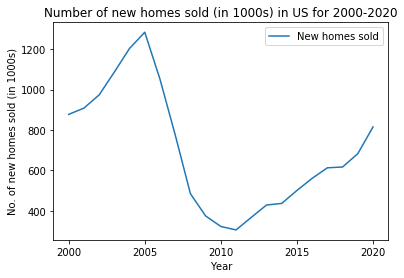

In [122]:
# Number of new homes sold
sns.lineplot(x = 'Year', y = 'NewSold_US', data = new_homes_sold_subset, label = 'New homes sold')
plt.title('Number of new homes sold (in 1000s) in US for 2000-2020')
plt.ylabel('No. of new homes sold (in 1000s)')
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.show()

- The number of new homes sold nation-wide give an idea about the current demand in the housing market. From the above plot, in 5 years since 2000 the number of new homes sold has gone up by 46% approximately. The real estate market was showed positive signs for growth.
- In 2005, the number of new homes sold peaked above 1,200,000. This maximum value has not been breached in the past 20 years.
- Then we see a downfall in the numbers in the next 5 years. A steep decline took place in the time of the financial crisis where the demand for new homes was at significantly low. Less than 400,000 new homes were sold around 2011, a record low.
- After the financial crisis, we can see a gradual recovery in the number of new homes sold. Close to 50% more new homes were sold in 2020 in comparison to 2011.

<h4>Supply-side factors

In [123]:
building_permit_subset.head(6)

,Year,Total_Building_Permits_US,1_unit_Building_Permits
0,2000,1592.3,1198.1
1,2001,1636.7,1235.6
2,2002,1747.7,1332.6
3,2003,1889.2,1460.9
4,2004,2070.1,1613.4
5,2005,2155.3,1682.0


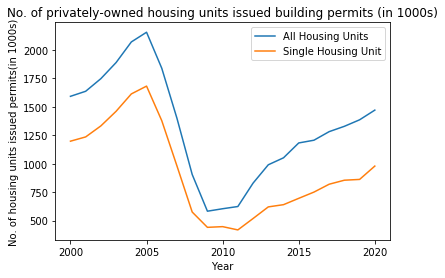

In [124]:
sns.lineplot(x = 'Year', y = 'Total_Building_Permits_US', data = building_permit_subset, label = \
             'All Housing Units')
sns.lineplot(x = 'Year', y = '1_unit_Building_Permits', data = building_permit_subset, label = \
             'Single Housing Unit')
plt.title('No. of privately-owned housing units issued building permits (in 1000s)')
plt.ylabel('No. of housing units issued permits(in 1000s)')
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.show()

- The supply-side of the housing market can be understood in terms of tracking the number of new homes constructed. This tracking is done through looking at Building Permits data.
- For all housing units, around 1,600,000 building permits were issued in 2000. This is followed by an upward trend for the next 5 years where 35% (approximately) more permits were given out.
- From 2005-2010, the selling numbers dropped dramatically by 72%. This period included the big financial crisis in 2008 where the buying sentiment among customers dampened.
- Beyond 2011, an upward trend is noticed in the construction activity of new housing units.

In [125]:
delinquency_annual_subset.head()

,Year,Annual_Delinquency_Rate
0,2000,2.0625
1,2001,2.3000
2,2002,2.1225
3,2003,1.8250
4,2004,1.5550


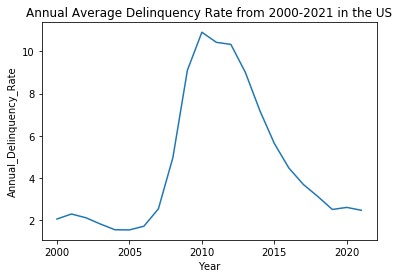

In [126]:
sns.lineplot(x = 'Year', y = 'Annual_Delinquency_Rate', data = delinquency_annual_subset)
plt.title('Annual Average Delinquency Rate from 2000-2021 in the US')
plt.show()

- Delinquency rate refers to the percentage of loans within a financial institution's loan portfolio becoming delinquent.
- The average delinquency rate in the US has gone through ups and downs. The rate was as low as 1% in the early 2000s.
- From 2008 onwards, delinquency rate rises steeply. The rate reaches a peak value close to 11% in 5 years. This sudden increase the rate implies more loans taken by customers became delinquent as customers missed successive monthly payments.
- This sudden jump explains the impact of the big financial crisis across the mortgage market.
- After 2012, we can see delinquency rates dropping rapidly which can explain the economic recovery kicking in the country. In this period of 5 years, customers are able to afford monthly mortgage repayments.
- In the end, the delinquency rate has not varied significantly from its level pre-covid.

<h4>Merging all the dataframes into a single one

In [127]:
mg = home_price_index_annual_subset.copy()

In [128]:
list_df = [gdp_growth_subset, mort_interest_subset, hcai_annual_subset, \
       hai_subset, num_households_subset, new_homes_sold_subset, building_permit_subset, delinquency_annual_subset]

In [129]:
for count, d in enumerate(list_df):
    mg = pd.merge(mg, d, on = 'Year')
    mg.columns

In [130]:
mg.head()

,Year,Home_Price_Index,GDP_Growth%,Mortgage_Rate,Average Total Risk,Housing_Affordability_Index,Total households,Total Family Households,Total Non-Family Households,%_Family_Households,NewSold_US,ExSold_US,Total_Building_Permits_US,1_unit_Building_Permits,Annual_Delinquency_Rate
0,2000,104.767833,4.077157,8.053462,13.96350,120.5,104705,72025,32680,68.788501,877,5174.0,1592.3,1198.1,2.0625
1,2001,113.178333,0.954342,6.967885,12.46725,128.1,108209,73767,34442,68.170855,908,5335.0,1636.7,1235.6,2.3000
2,2002,122.277750,1.695943,6.537308,12.18050,124.2,109297,74329,34969,68.006441,973,5632.0,1747.7,1332.6,2.1225
3,2003,133.730583,2.796206,5.826981,12.50925,128.2,111278,75596,35682,67.934363,1086,6175.0,1889.2,1460.9,1.8250
4,2004,150.439583,3.852555,5.839231,14.93700,120.3,112000,76217,35783,68.050893,1203,6778.0,2070.1,1613.4,1.5550


<h3>Multivariate analysis

<h4>Heatmap of the correlation matrix of the merged dataframe

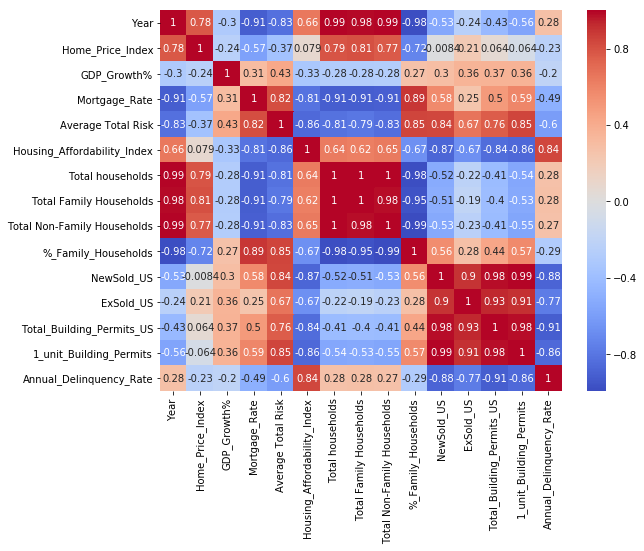

In [131]:
plt.figure(figsize = (9,7))
sns.heatmap(mg.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [132]:
col_list = mg.columns

<h4>Histograms of the features

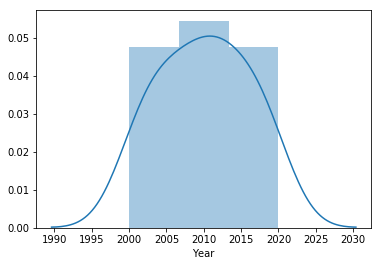

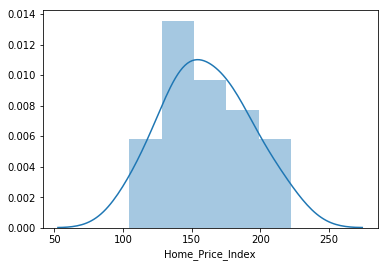

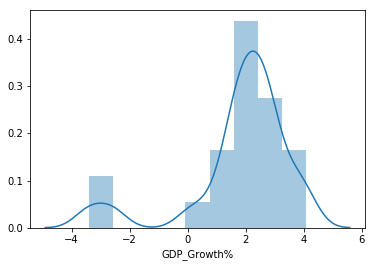

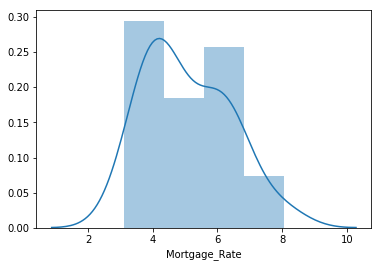

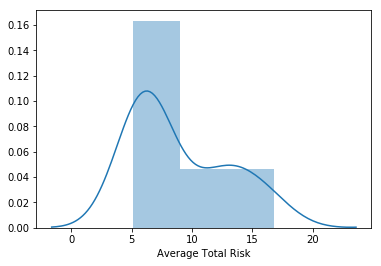

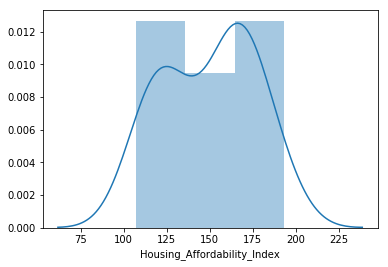

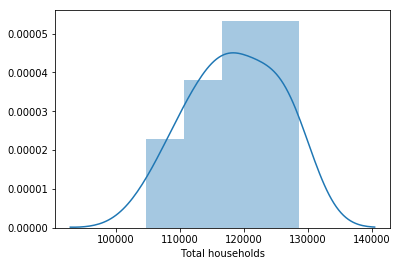

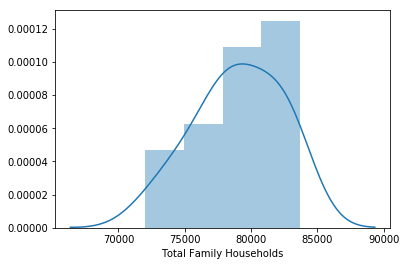

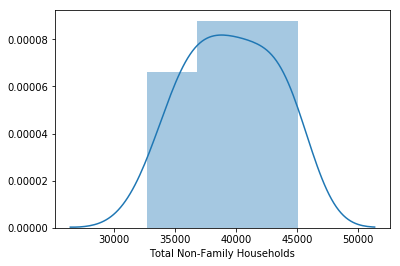

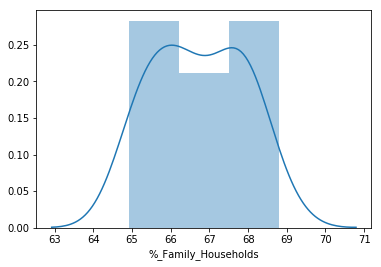

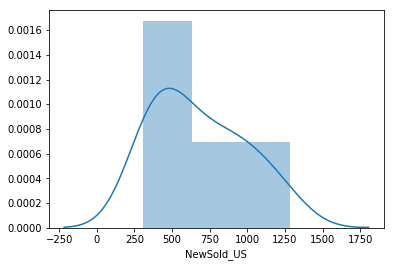

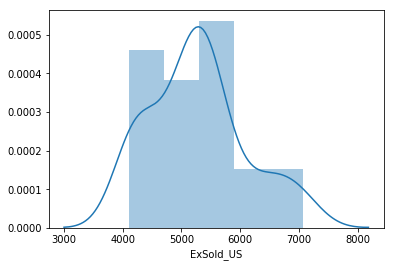

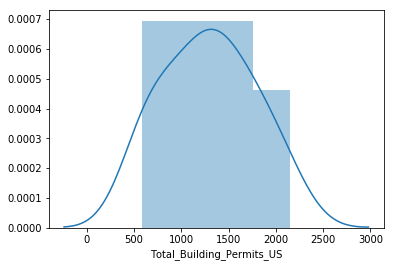

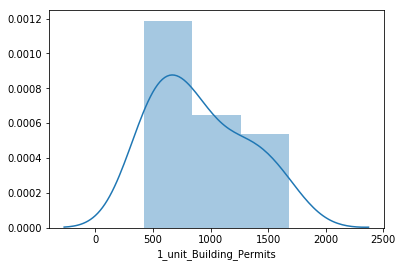

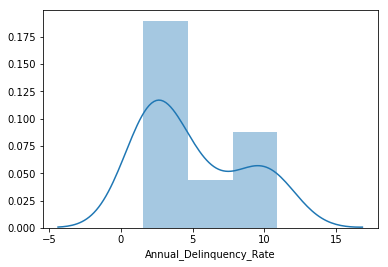

In [133]:
for c in col_list:
    sns.distplot(mg[c], kde = True)
    plt.show()

In [134]:
correlations = mg.corr()
print(correlations['Home_Price_Index'].sort_values(ascending = False))

Home_Price_Index               1.000000
Total Family Households        0.808388
Total households               0.792186
Year                           0.777601
Total Non-Family Households    0.771368
ExSold_US                      0.209485
Housing_Affordability_Index    0.079397
Total_Building_Permits_US      0.064458
NewSold_US                    -0.008434
1_unit_Building_Permits       -0.064156
Annual_Delinquency_Rate       -0.233646
GDP_Growth%                   -0.238365
Average Total Risk            -0.368303
Mortgage_Rate                 -0.574369
%_Family_Households           -0.721070
Name: Home_Price_Index, dtype: float64


- The response feature 'Home_Price_Index' shows close to 80% positive correlation to 'Total Households'.
- On the other hand, 'Housing_Affordability_Index', 'Total_Building_Permits_US' and 'NewSold_US' have no correlation to 'Home_Price_Index'.
- Features like 'Mortgage_Rate', 'Average Total Risk', 'GDP_Growth%' and 'Annual_Delinquency_Rate' show negative correlation to the target variable.

<h3>Bivariate analysis

In [135]:
""" Plotting function for two y features on a single plot with a single x-axis
    Arguments: x - Name of the feature to be on the x-axis (data type is string)
               y1 - Name of the first dependent variable (data type is string)
               y2 - Name of the second dependent variable (data type is string)
               title - Title of the plot (data type is string)
               legend_y1 - Setting the loc for 'y1' feature
               legend_y2 - Setting the loc for 'y2' feature
"""
def plot_two_y_vars(x, y1, y2, title, legend_y1 = 'best', legend_y2 = 'best'):
    plt.figure(figsize = (8,7))
    sns.lineplot(x = x, y = y1, color = 'r', label = y1, data = mg)
    ax2 = plt.twinx()
    sns.lineplot(x = x, y = y2, color = 'b', label = y2, data = mg)
    plt.xticks([2000, 2005, 2010, 2015, 2020])
    plt.title(title)
    plt.legend(loc = legend_y1)
    ax2.legend(loc = legend_y2)

<h4>Mortgage rate and Delinquency rate

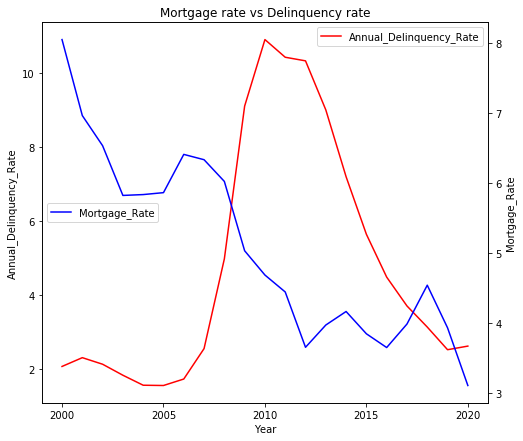

In [136]:
# Bivariate analysis
# mortgage rate and delinquency rate
plot_two_y_vars('Year', 'Annual_Delinquency_Rate', 'Mortgage_Rate', 'Mortgage rate vs Delinquency rate', \
               'best', 'center left')
plt.show()

<h4>Mortgage rate and Home Price Index

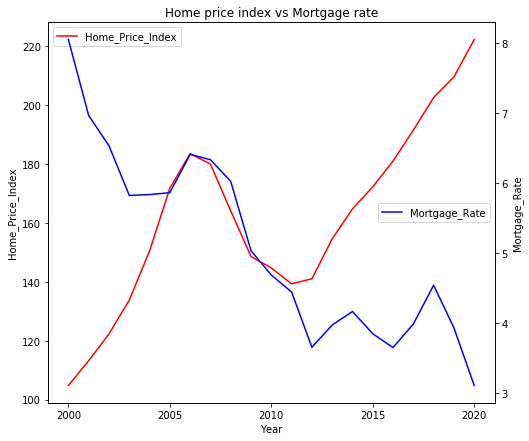

In [137]:
# mortgage rate and home price index
plot_two_y_vars('Year', 'Home_Price_Index', 'Mortgage_Rate', 'Home price index vs Mortgage rate', \
               'lower center', 'center right')
plt.show()

<h4>Mortgage rate and Housing Credit Availability Index

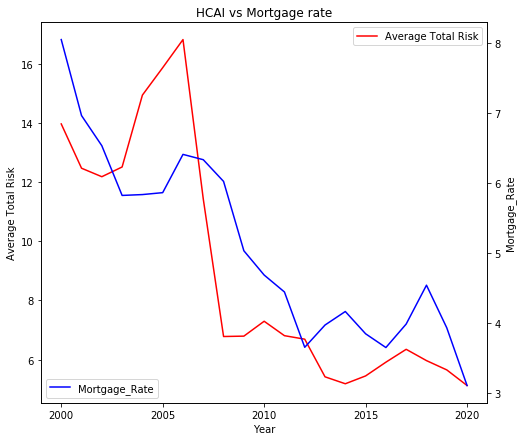

In [138]:
# mortgage rate and HCAI (Average total risk)
plot_two_y_vars('Year', 'Average Total Risk', 'Mortgage_Rate', 'HCAI vs Mortgage rate', \
               legend_y2 = 'lower left')
plt.show()

<h4>Mortgage rate and Housing Affordability Index

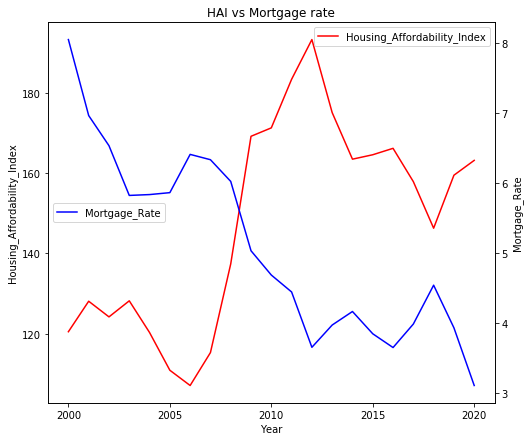

In [139]:
# mortgage rate and HAI
plot_two_y_vars('Year', 'Housing_Affordability_Index', 'Mortgage_Rate', 'HAI vs Mortgage rate', legend_y2 = 'center left')
plt.show()

In [140]:
mg.columns

Index(['Year', 'Home_Price_Index', 'GDP_Growth%', 'Mortgage_Rate',
       'Average Total Risk', 'Housing_Affordability_Index', 'Total households',
       'Total Family Households', 'Total Non-Family Households',
       '%_Family_Households', 'NewSold_US', 'ExSold_US',
       'Total_Building_Permits_US', '1_unit_Building_Permits',
       'Annual_Delinquency_Rate'],
      dtype='object')

<h4>Mortgage rate and GDP Growth %

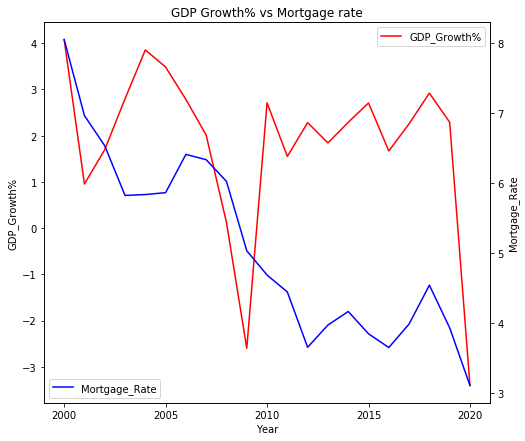

In [141]:
plot_two_y_vars('Year', 'GDP_Growth%', 'Mortgage_Rate', 'GDP Growth% vs Mortgage rate', legend_y2 = 'lower left')
plt.show()

<h4>Home Price Index and GDP Growth%

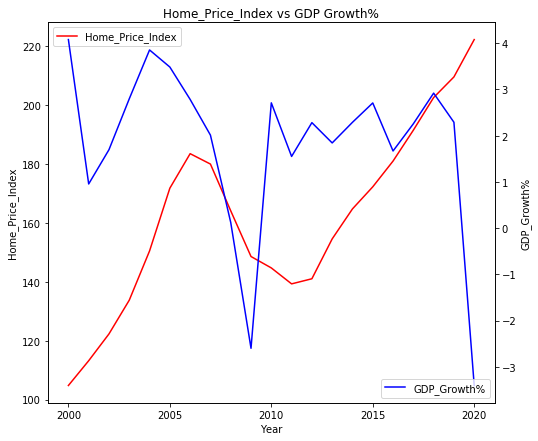

In [142]:
plot_two_y_vars('Year', 'Home_Price_Index', 'GDP_Growth%', 'Home_Price_Index vs GDP Growth%',\
                legend_y2 = 'lower right')
plt.show()

- The GDP growth gone through a couple of V-shaped trends in the 20 years. In the first 5 years, economic growth in  the US strengthened with the GDP rising by 4% in 2005.
- The economic growth gone through a negative phase from 2008-2011 with the GDP growth at -2% in 2009.
- There seems to be less or no correlation between the home price index and the GDP Growth %.

<h4>Home Price Index and Housing Credit Availability Index

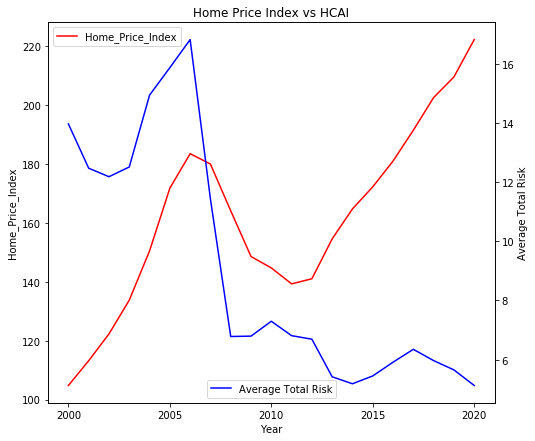

In [143]:
plot_two_y_vars('Year', 'Home_Price_Index', 'Average Total Risk', 'Home Price Index vs HCAI',\
                legend_y2 = 'lower center')
plt.show()

- Housing Credit Availability Index measures the difficulty of getting a mortgage by quantifying the lender's tolerance for risk.
- Lower HCAI means the lenders are unwilling to tolerate defaults on loans and are imposing tighter lending standards, which makes it difficult to get a mortgage.
- Conversely, a higher HCAI means the lenders are willing tolerate defaults and take more risks, hence getting a mortgage becomes easy.
- When attaining a mortgage loan becomes easy, more households feel confident in purchasing a new home.
- From the above plot, between 2000-2005 the credit availability index grew gradually. In this same period, the home prices witnessed a steep rise due to greater demand in the real estate market.
- Around the time of the big financial crisis, the housing credit availability index plunged from its peak by 143% approximately. Borrowers were not able to finance a purchase for a new house and lenders imposed tighter lending standards and they were not open to take risks.
- Then after 2012, as the market started to recover from the effects of the crisis, home prices saw a positive growth whereas the housing credit availability index did not follow suit.

<h4>Home Price Index and Housing Affordability Index

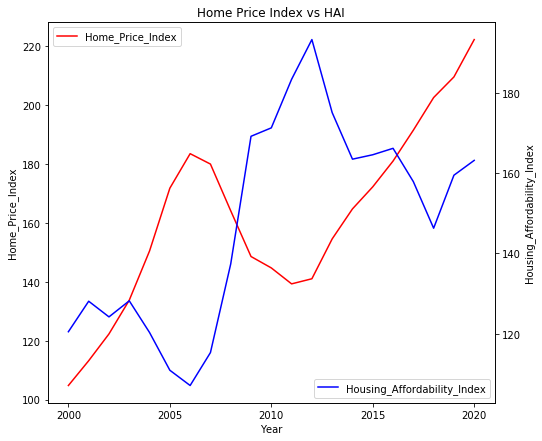

In [145]:
plot_two_y_vars('Year', 'Home_Price_Index', 'Housing_Affordability_Index', 'Home Price Index vs HAI',\
                legend_y2 = 'lower right')
plt.show()

- Housing Affordability Index measures whether a median-income family has enough income to purchase a median-priced house assuming borrowers make 20% downpayment and the maximum mortgage payment is 25% of the gross monthly income of the household.
- A higher HAI implies that more households have enough income to afford a new home.
- The above trends show that at the time of the price boom in the real estate market, homes became difficult to afford for a median-income household. Around 2006, the home price index peaked whereas the HAI hit a record low.
- In the coming years, the housing affordability index rose by 80%. On the other hand home prices dropped across the country. The impact of the financial crisis caused demand for new homes to drop, leading to rising housing affordability index.
- The general trend shows an s-shaped curve for the features.

<h4>Home Price Index and Total households

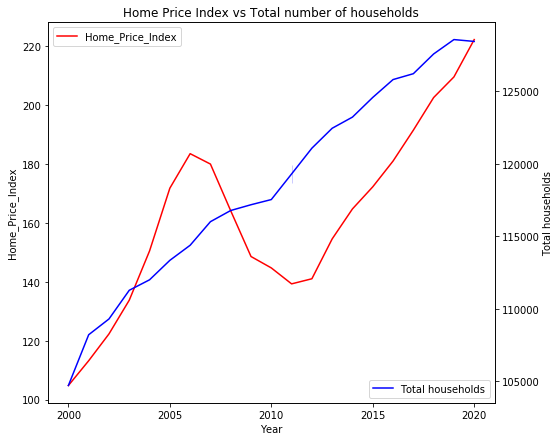

In [146]:
plot_two_y_vars('Year', 'Home_Price_Index', 'Total households', 'Home Price Index vs Total number of households',\
                legend_y2 = 'lower right')
plt.show()

- Number of households have risen in the past 20 years in the US with around 23000 more households in 2020 compared to the start of the new millenium.
- On looking the plot of the two features, there seems to be no correlation between them.

<h4>Home Price Index and No. of New Homes Sold

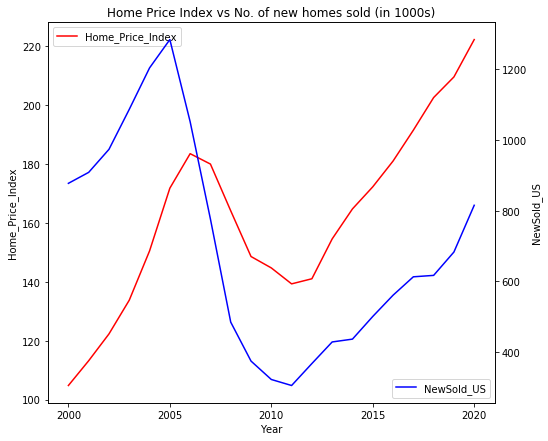

In [147]:
plot_two_y_vars('Year', 'Home_Price_Index', 'NewSold_US', 'Home Price Index vs No. of new homes sold (in 1000s)',\
                legend_y2 = 'lower right')
plt.show()

- The number of new homes sold rose sharply in the early 5 years, indicating a high demand in the real estate market. Moreover, the rising home price index explain the presence of increasing demand among the consumers. Over 1,200,000 new homes were sold in 2005.
- From 2005-2012 the number of homes sold per year dropped dramatically by close to 76%. This is the result of the damaging impact of the huge financial crisis in 2008. The home prices also follow the same dropping trend in this time period.
- Beyond 2012, demand for new homes starts to pick up gradually among consumers across the country. In the next 8 years, the home price index reached a record high north of 220 in 2020.

<h4>Home Price Index and No. of Building Permits issued

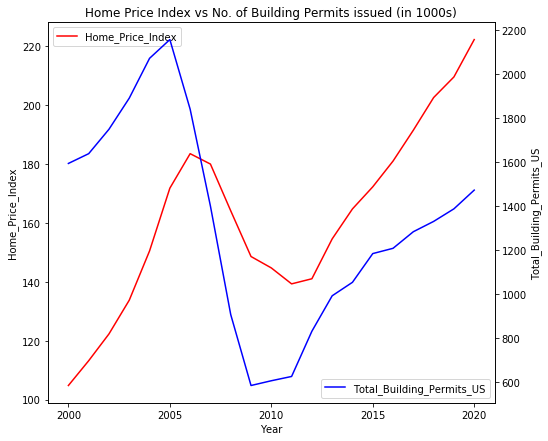

In [148]:
plot_two_y_vars('Year', 'Home_Price_Index', 'Total_Building_Permits_US', \
                'Home Price Index vs No. of Building Permits issued (in 1000s)', legend_y2 = 'lower right')
plt.show()

- Before 2005, construction activity was booming in the country when we look at the number of building permits issued to new housing units. This implies more supply of homes in the market. In addition, home prices also grew in this period.
- Then in the next 5 years we notice a drastic drop in the number of building permits given to new housing units. At the height of the financial crisis, the construction activity was at a record low with only 600,000 permits given out, which is approximately a 73% less than the total number in 2005.
- An S-shaped feature is noted for both the features. 

<h4>Home Price Index and Delinquency Rate

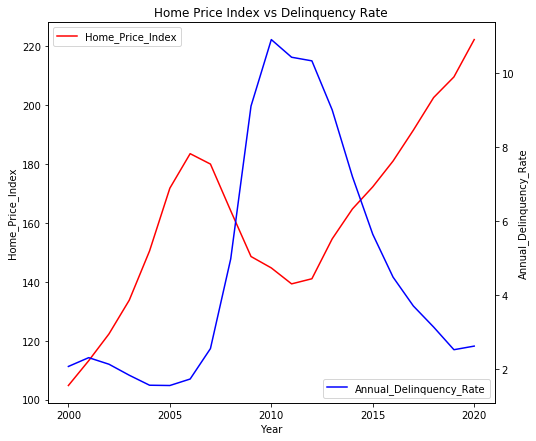

In [149]:
plot_two_y_vars('Year', 'Home_Price_Index', 'Annual_Delinquency_Rate', 'Home Price Index vs Delinquency Rate',\
                legend_y2 = 'lower right')
plt.show()

- As you can see from the above plot, at the start of big financial crisis in the US, the delinquency rate hits a maximum. People would have missed multiple monthly mortgage payments in this period due to severy job loss and loss of income.
- With a high delinquency rate, home prices dropped across the country as seen from the home price index.